<a href="https://colab.research.google.com/github/Thejus-1503/DECISION-TREE-IMPLEMENTATION/blob/main/DECISION_TREE_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('/content/drive/MyDrive/drug200 (1).csv')

In [3]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# Let's understand the data, how it look like.
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# Let's check whether data set consist of any missing values.
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [6]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY


In [7]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4


In [8]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


In [9]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Na_to_K      200 non-null    float64
 2   Sex          200 non-null    int64  
 3   BP           200 non-null    int64  
 4   Cholesterol  200 non-null    int64  
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [10]:
# convert type of target variable Drug to categorical
df['Drug'] = df['Drug'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Na_to_K      200 non-null    float64 
 2   Sex          200 non-null    int64   
 3   BP           200 non-null    int64   
 4   Cholesterol  200 non-null    int64   
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(4)
memory usage: 8.3 KB


In [11]:
# Importing train-test-split
from sklearn.model_selection import train_test_split

In [12]:
# Putting feature variable to X
X = df.drop('Drug',axis=1)

# Putting response variable to y
y = df['Drug']

In [13]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 99)
X_train.head()

,Age,Na_to_K,Sex,BP,Cholesterol
16,69,11.455,1,1,1
51,67,10.898,1,2,1
97,56,25.395,0,0,0
164,16,19.007,1,0,1
71,28,19.675,0,2,0


In [14]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.93      0.97        15
           4       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.99      0.99        40
weighted avg       0.98      0.97      0.97        40



In [16]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[ 7  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0 14  1]
 [ 0  0  0  0 15]]
0.975


In [17]:
# Importing required packages for visualization
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[0:5])
features

['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol']

In [18]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

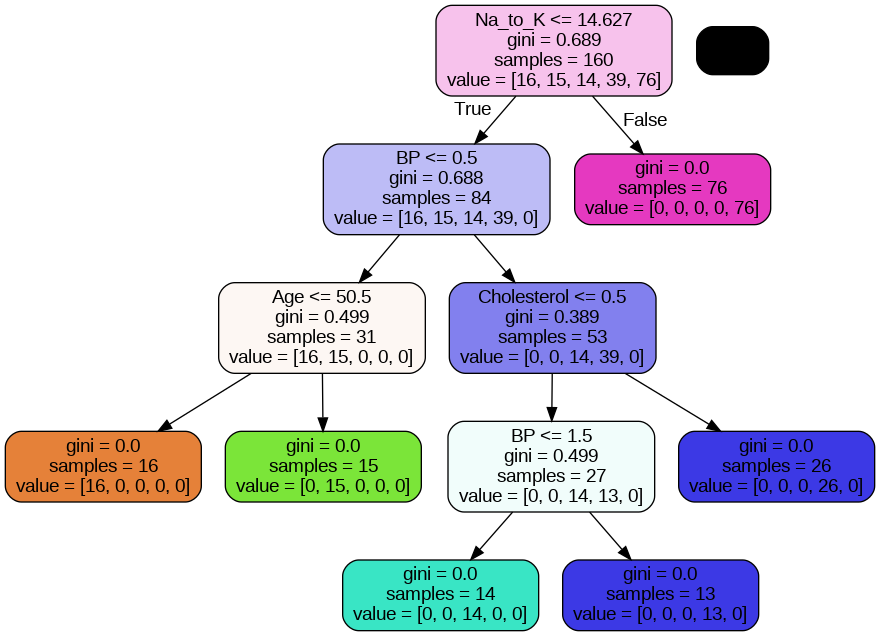

In [19]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [21]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003657,0.001017,0.002541,0.000633,1,{'max_depth': 1},0.71875,0.71875,0.71875,0.71875,...,0.71875,0.000000,39,0.718750,0.718750,0.718750,0.718750,0.718750,0.71875,0.000000
1,0.002980,0.000381,0.001988,0.000038,2,{'max_depth': 2},0.84375,0.81250,0.81250,0.81250,...,0.81875,0.012500,38,0.812500,0.820312,0.820312,0.820312,0.820312,0.81875,0.003125
2,0.003413,0.000842,0.002760,0.000986,3,{'max_depth': 3},0.90625,0.87500,0.78125,0.90625,...,0.88125,0.053765,37,0.921875,0.929688,0.937500,0.921875,0.914062,0.92500,0.007967
3,0.007080,0.003456,0.004109,0.001492,4,{'max_depth': 4},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.025000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
4,0.004165,0.000126,0.002917,0.000051,5,{'max_depth': 5},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.025000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000


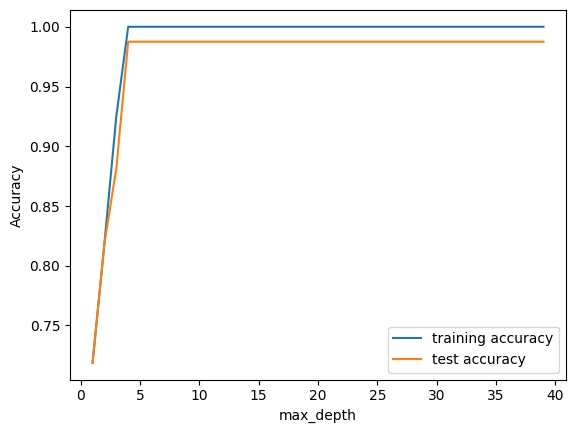

In [22]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [24]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004177,0.000954,0.003191,0.000906,5,{'min_samples_leaf': 5},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.0250,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
1,0.004138,0.000153,0.003105,0.000082,25,{'min_samples_leaf': 25},0.68750,0.81250,0.81250,0.81250,...,0.78750,0.0500,2,0.718750,0.820312,0.820312,0.820312,0.820312,0.80000,0.040625
2,0.004152,0.000294,0.003235,0.000299,45,{'min_samples_leaf': 45},0.71875,0.71875,0.71875,0.71875,...,0.71875,0.0000,3,0.718750,0.718750,0.718750,0.718750,0.718750,0.71875,0.000000
3,0.007005,0.003822,0.003962,0.001727,65,{'min_samples_leaf': 65},0.46875,0.46875,0.46875,0.46875,...,0.47500,0.0125,4,0.476562,0.476562,0.476562,0.476562,0.468750,0.47500,0.003125
4,0.003934,0.000207,0.002986,0.000063,85,{'min_samples_leaf': 85},0.46875,0.46875,0.46875,0.46875,...,0.47500,0.0125,4,0.476562,0.476562,0.476562,0.476562,0.468750,0.47500,0.003125


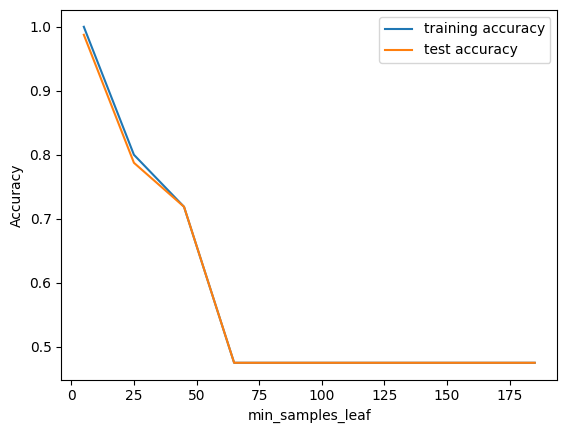

In [25]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [27]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004222,0.001334,0.002981,0.001303,5,{'min_samples_split': 5},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.02500,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
1,0.004364,0.001238,0.003626,0.001184,25,{'min_samples_split': 25},0.81250,0.87500,0.78125,0.90625,...,0.86250,0.05796,2,0.828125,0.929688,0.937500,0.921875,0.914062,0.90625,0.039836
2,0.005745,0.001273,0.003722,0.000412,45,{'min_samples_split': 45},0.84375,0.81250,0.81250,0.81250,...,0.81875,0.01250,3,0.812500,0.820312,0.820312,0.820312,0.820312,0.81875,0.003125
3,0.004282,0.000351,0.003387,0.000132,65,{'min_samples_split': 65},0.84375,0.81250,0.81250,0.81250,...,0.81875,0.01250,3,0.812500,0.820312,0.820312,0.820312,0.820312,0.81875,0.003125
4,0.004547,0.000478,0.003092,0.000150,85,{'min_samples_split': 85},0.71875,0.71875,0.71875,0.71875,...,0.71875,0.00000,5,0.718750,0.718750,0.718750,0.718750,0.718750,0.71875,0.000000


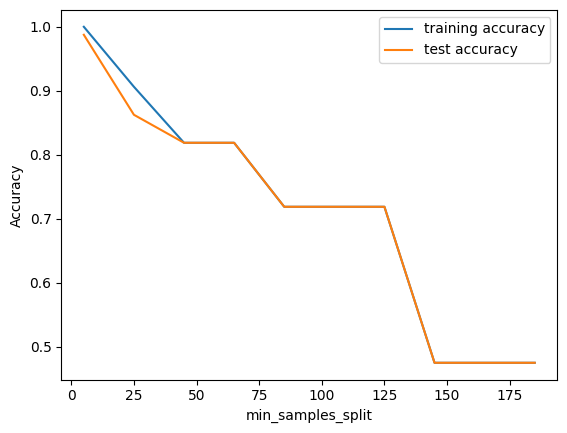

In [28]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [30]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003206,0.000361,0.002672,0.000735,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
1,0.002623,0.000213,0.001973,0.000142,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
2,0.002310,0.000238,0.001814,0.000145,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
3,0.002286,0.000091,0.001815,0.000104,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
4,0.003234,0.000385,0.002202,0.000036,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
5,0.003090,0.000128,0.002229,0.000158,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
6,0.003388,0.000524,0.002797,0.000895,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
7,0.004317,0.000585,0.003639,0.001040,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
8,0.004010,0.000638,0.003073,0.000394,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
9,0.003534,0.000226,0.002765,0.000086,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1


In [31]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.71875
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [32]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=10,min_samples_leaf=50,min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [33]:
# accuracy score
clf_gini.score(X_test,y_test)

0.725

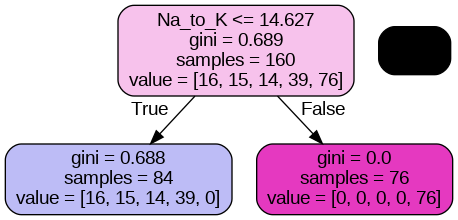

In [34]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict using your classifier
y_pred = clf_gini.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report with zero_division=0 to suppress the warning
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
[[ 0  0  0  7  0]
 [ 0  0  0  1  0]
 [ 0  0  0  2  0]
 [ 0  0  0 14  1]
 [ 0  0  0  0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.58      0.93      0.72        15
           4       0.94      1.00      0.97        15

    accuracy                           0.72        40
   macro avg       0.30      0.39      0.34        40
weighted avg       0.57      0.72      0.63        40

